### EDA for Political Email Database

In [49]:
#Read in the data
import pandas as pd

df1=pd.read_csv("https://raw.githubusercontent.com/statzenthusiast921/political-emails-analysis/main/main/data/emails1_df.csv")
df2=pd.read_csv("https://raw.githubusercontent.com/statzenthusiast921/political-emails-analysis/main/main/data/emails2_df.csv")
df3=pd.read_csv("https://raw.githubusercontent.com/statzenthusiast921/political-emails-analysis/main/main/data/emails3_df.csv")
df4=pd.read_csv("https://raw.githubusercontent.com/statzenthusiast921/political-emails-analysis/main/main/data/emails4_df.csv")

print(df1.shape)
print(df2.shape)
print(df3.shape)
print(df4.shape)

(20000, 9)
(20000, 9)
(20000, 9)
(23316, 9)


In [50]:
#Stack 4 dataframes together
df = pd.concat([df1, df2, df3, df4], ignore_index=True, axis=0)
#Delete first row and column
df = df[1:]
df = df.iloc[: , 1:]
#Preview dataframe
df.head(2)

,sender,subject,date,body,party,country,locality,office
1,JusticeDemocrats.com <[email protected]>,Critical preparations,"July 3, 2019 11:28 PM",[1]Justice Democrats\n\r\n John -- \n\r\n ...,Political Party:\nDemocratic,Country:\n\nUnited States,State/Locality:\n\t\t\t\t\t\t\t\t\t\t\t\t\tn/a,Office:\n\t\t\t\t\t\t\t\t\t\t\t\t\tn/a
2,Ana Maria Archila <[email protected]>,TAKE ACTION for Freedom: #CloseTheCamps,"July 3, 2019 11:31 PM","Dear friend,\n\r\n \n\r\nWe have all seen the ...",Political Party:\n\t\t\t\t\t\t\t\t\t\t\t\t\tn/a,Country:\n\nUnited States,State/Locality:\n\t\t\t\t\t\t\t\t\t\t\t\t\tn/a,Office:\n\t\t\t\t\t\t\t\t\t\t\t\t\tn/a


### Clean up various columns

In [51]:
#Clean up columns - change data type
df['sender'] = df['sender'].astype('string')
df['subject'] = df['subject'].astype('string')
df['date'] = df['date'].astype('string')
df['body'] = df['body'].astype('string')
df['party'] = df['party'].astype('string')
df['country'] = df['country'].astype('string')
df['locality'] = df['locality'].astype('string')
df.dtypes

sender      string
subject     string
date        string
body        string
party       string
country     string
locality    string
office      object
dtype: object

In [52]:
#Clean up text columns
import re 

df['party'] = df['party'].replace('Political Party:','',regex=True)
df['country'] = df['country'].replace('Country:','',regex=True)
df['locality'] = df['locality'].replace('State/Locality:','',regex=True)
df['office'] = df['office'].replace('Office:','',regex=True)
df = df.replace('\n','',regex=True)
df = df.replace('\t','',regex=True)
df['sender'] = df['sender'].replace('<','',regex=True)
df['sender'] = df['sender'].replace('>','',regex=True)

def remove_brackets_contents(text):
    pattern = r"\[.*?\]"
    return re.sub(pattern, " ", text)


def remove_special_characters(text):
    # define the pattern to keep
    pat = r'[^a-zA-z0-9.,!?/:;\"\'\s]' 
    return re.sub(pat, ' ', text)

df.loc[:,'sender'] = df['sender'].apply(func = remove_brackets_contents)


df.head(2)

,sender,subject,date,body,party,country,locality,office
1,JusticeDemocrats.com,Critical preparations,"July 3, 2019 11:28 PM",[1]Justice Democrats John -- Last month...,Democratic,United States,n/a,n/a
2,Ana Maria Archila,TAKE ACTION for Freedom: #CloseTheCamps,"July 3, 2019 11:31 PM","Dear friend, We have all seen the images and...",n/a,United States,n/a,n/a


In [53]:
#Cleaning up the email body column
import warnings
warnings.filterwarnings('ignore')

df['body'] = df['body'].replace('\n','',regex=True)
df['body'] = df['body'].replace('\r','',regex=True)
df.loc[:,'body'] = df['body'].apply(func = remove_brackets_contents)
df.loc[:,'body'] = df['body'].apply(func = remove_special_characters)


df['body'] = df['body'].replace('   ',' ',regex=True)
df['body'] = df['body'].replace('    ',' ',regex=True)
df['body'] = df['body'].replace('     ',' ',regex=True)

df['body'] = df['body'].replace(']',' ',regex=True)
df['body'] = df['body'].replace('\xa0',' ',regex=True)
df['body'] = df['body'].replace('almostdaily','almost daily',regex=True)


#Remove all the text that follows these sentences
df['body'] = df['body'].str.replace("(If you need to remove yourself from our email).*","")
df['body'] = df['body'].str.replace("(Email is the most important way).*","")
df['body'] = df['body'].str.replace("(This email was sent to).*","")
df['body'] = df['body'].str.replace("(Thank you for speaking).*","")
df['body'] = df['body'].str.replace("(All Rights Reserved).*","")
df['body'] = df['body'].str.replace("(mailto:).*","")
df['body'] = df['body'].str.replace("(Thank you for choosing to fight).*","")
df['body'] = df['body'].str.replace("(Paid for by).*","")
df['body'] = df['body'].str.replace("(We look forward to hearing from you).*","")
df['body'] = df['body'].str.replace("(PAID FOR BY).*","")
df['body'] = df['body'].str.replace("(Thanks for your).*","")
df['body'] = df['body'].str.replace("(All rights reserved).*","")
df['body'] = df['body'].str.replace("(unsubscribe).*","")
df['body'] = df['body'].str.replace("(Sincerely).*","")
df['body'] = df['body'].str.replace("(Facebook).*","")
df['body'] = df['body'].str.replace("(Twitter).*","")
df['body'] = df['body'].str.replace("(Please, sign your name).*","")
df['body'] = df['body'].str.replace("(CONTRIBUTE).*","")
df['body'] = df['body'].str.replace("(Contribute).*","")

### Create features

In [54]:
df[['split1','split2','split3','split4','split5']] = df['date'].str.split(' ',expand=True)
df['date'] = df['split1'] + ' ' + df['split2'] + ' ' + df['split3']
df['time'] = df['split4'] + ' ' + df['split5']

del df['split1'], df['split2'], df['split3'], df['split4'], df['split5']
print(df['date'][1])
print(df['time'][1])

July 3, 2019
11:28 PM


In [55]:
df.head(2)

,sender,subject,date,body,party,country,locality,office,time
1,JusticeDemocrats.com,Critical preparations,"July 3, 2019","Justice Democrats John Last month, we neede...",Democratic,United States,n/a,n/a,11:28 PM
2,Ana Maria Archila,TAKE ACTION for Freedom: #CloseTheCamps,"July 3, 2019","Dear friend, We have all seen the images and r...",n/a,United States,n/a,n/a,11:31 PM


In [56]:
import numpy as np

df['AM_PM'] = df['time'].str[-2:]
df['Hour'] = df['time'].str[:2]
df['Hour'] = np.where(df['Hour'].str[1:]==":",df['Hour'].str[:1],df['Hour'])
df['Hour'] = df['Hour'].astype(int)

df['Hour_Mil'] = np.where(
    df['AM_PM'] == 'PM', df['Hour'] + 12, np.where(
    (df['AM_PM'] == 'AM') & (df['Hour'] == 12), df['Hour'] - 12, df['Hour'])) 


df.head(2)

,sender,subject,date,body,party,country,locality,office,time,AM_PM,Hour,Hour_Mil
1,JusticeDemocrats.com,Critical preparations,"July 3, 2019","Justice Democrats John Last month, we neede...",Democratic,United States,n/a,n/a,11:28 PM,PM,11,23
2,Ana Maria Archila,TAKE ACTION for Freedom: #CloseTheCamps,"July 3, 2019","Dear friend, We have all seen the images and r...",n/a,United States,n/a,n/a,11:31 PM,PM,11,23


In [57]:
#Grab the day, month, year
df[['month','day','year']] = df['date'].str.split(' ',expand=True)
df['day'] = df['day'].str[:1]


df['month_num'] = np.where(
    df['month'] == 'January', 1, np.where(
    df['month'] == 'February', 2, np.where(
    df['month'] == 'March', 3, np.where(
    df['month'] == 'April', 4, np.where(
    df['month'] == 'May', 5, np.where(
    df['month'] == 'June', 6, np.where(
    df['month'] == 'July', 7, np.where(
    df['month'] == 'August', 8, np.where(
    df['month'] == 'September', 9, np.where(
    df['month'] == 'October', 10, np.where(
    df['month'] == 'November', 11, 12
)))))))))))



df.head(2)

,sender,subject,date,body,party,country,locality,office,time,AM_PM,Hour,Hour_Mil,month,day,year,month_num
1,JusticeDemocrats.com,Critical preparations,"July 3, 2019","Justice Democrats John Last month, we neede...",Democratic,United States,n/a,n/a,11:28 PM,PM,11,23,July,3,2019,7
2,Ana Maria Archila,TAKE ACTION for Freedom: #CloseTheCamps,"July 3, 2019","Dear friend, We have all seen the images and r...",n/a,United States,n/a,n/a,11:31 PM,PM,11,23,July,3,2019,7


In [58]:
df_dom = df[df['country']=="United States"]
df_for = df[df['country']!="United States"]

print(df_dom.shape)
print(df_for.shape)

(74148, 16)
(9167, 16)


### Exploratory Data Analysis

#### Emails Sent over Time

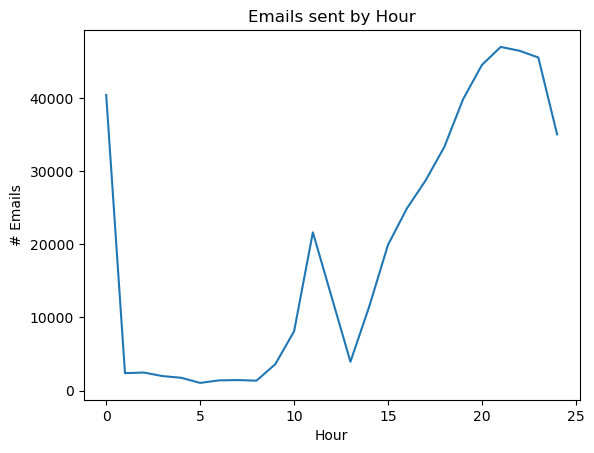

In [59]:
#When are emails sent?
new_df = df_dom.groupby(['Hour_Mil']).sum().reset_index()
new_df.rename(columns={ new_df.columns[1]: "Count" }, inplace = True)


import matplotlib.pyplot as plt

plt.plot(new_df['Hour_Mil'],new_df['Count'])
plt.title('Emails sent by Hour')
plt.xlabel('Hour')
plt.ylabel('# Emails')
plt.show()

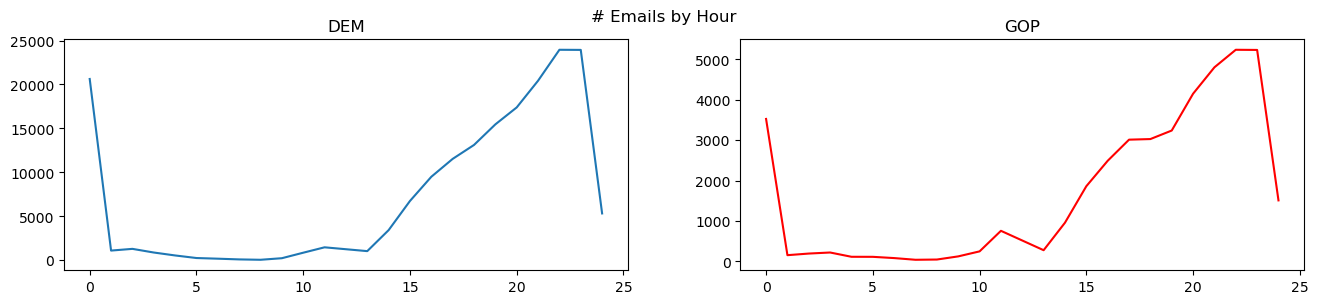

In [60]:
#When are emails sent by party?

df_dom_dem = df_dom[df_dom['party']=="Democratic"]
df_dom_gop = df_dom[df_dom['party']=="Republican"]


new_df1 = df_dom_dem.groupby(['Hour_Mil']).sum().reset_index()
new_df1.rename(columns={new_df1.columns[1]: "Count" }, inplace = True)

new_df2 = df_dom_gop.groupby(['Hour_Mil']).sum().reset_index()
new_df2.rename(columns={new_df2.columns[1]: "Count" }, inplace = True)

f = plt.figure()
f.set_figwidth(16)
f.set_figheight(3)

#plot 1:
plt.subplot(1, 2, 1)
plt.plot(new_df1['Hour_Mil'],new_df1['Count'])
plt.title("DEM")

#plot 2:

plt.subplot(1, 2, 2)
plt.plot(new_df2['Hour_Mil'],new_df2['Count'],color='red')
plt.title("GOP")

plt.suptitle("# Emails by Hour")
plt.show()

In [62]:
#Emails sent by month
month1_emails = df_dom[df_dom['month_num']==1]
month2_emails = df_dom[df_dom['month_num']==2]
month3_emails = df_dom[df_dom['month_num']==3]
month4_emails = df_dom[df_dom['month_num']==4]
month5_emails = df_dom[df_dom['month_num']==5]
month6_emails = df_dom[df_dom['month_num']==6]
month7_emails = df_dom[df_dom['month_num']==7]
month8_emails = df_dom[df_dom['month_num']==8]
month9_emails = df_dom[df_dom['month_num']==9]
month10_emails = df_dom[df_dom['month_num']==10]
month11_emails = df_dom[df_dom['month_num']==11]
month12_emails = df_dom[df_dom['month_num']==12]

m1 = month1_emails.groupby(['Hour_Mil']).sum().reset_index()
m2 = month2_emails.groupby(['Hour_Mil']).sum().reset_index()
m3 = month3_emails.groupby(['Hour_Mil']).sum().reset_index()
m4 = month4_emails.groupby(['Hour_Mil']).sum().reset_index()
m5 = month5_emails.groupby(['Hour_Mil']).sum().reset_index()
m6 = month6_emails.groupby(['Hour_Mil']).sum().reset_index()
m7 = month7_emails.groupby(['Hour_Mil']).sum().reset_index()
m8 = month8_emails.groupby(['Hour_Mil']).sum().reset_index()
m9 = month9_emails.groupby(['Hour_Mil']).sum().reset_index()
m10 = month10_emails.groupby(['Hour_Mil']).sum().reset_index()
m11 = month11_emails.groupby(['Hour_Mil']).sum().reset_index()
m12 = month12_emails.groupby(['Hour_Mil']).sum().reset_index()

m1.rename(columns={ m1.columns[1]: "Count" }, inplace = True)
m2.rename(columns={ m2.columns[1]: "Count" }, inplace = True)
m3.rename(columns={ m3.columns[1]: "Count" }, inplace = True)
m4.rename(columns={ m4.columns[1]: "Count" }, inplace = True)
m5.rename(columns={ m5.columns[1]: "Count" }, inplace = True)
m6.rename(columns={ m6.columns[1]: "Count" }, inplace = True)
m7.rename(columns={ m7.columns[1]: "Count" }, inplace = True)
m8.rename(columns={ m8.columns[1]: "Count" }, inplace = True)
m9.rename(columns={ m9.columns[1]: "Count" }, inplace = True)
m10.rename(columns={ m10.columns[1]: "Count" }, inplace = True)
m11.rename(columns={ m11.columns[1]: "Count" }, inplace = True)
m12.rename(columns={ m12.columns[1]: "Count" }, inplace = True)


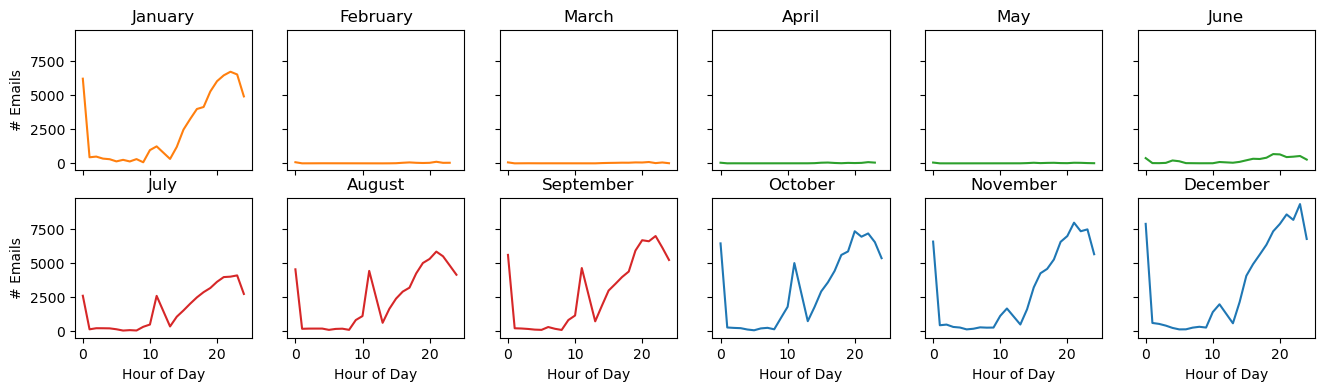

In [63]:
fig, axs = plt.subplots(2, 6,sharex=True, sharey=True, figsize=(16,4))

axs[0, 0].plot(m1['Hour_Mil'], m1['Count'], 'tab:orange')
axs[0, 0].set_title('January')

axs[0, 1].plot(m2['Hour_Mil'], m2['Count'], 'tab:orange')
axs[0, 1].set_title('February')

axs[0, 2].plot(m3['Hour_Mil'], m3['Count'], 'tab:orange')
axs[0, 2].set_title('March')

axs[0, 3].plot(m4['Hour_Mil'], m4['Count'], 'tab:green')
axs[0, 3].set_title('April')

axs[0, 4].plot(m5['Hour_Mil'], m5['Count'], 'tab:green')
axs[0, 4].set_title('May')

axs[0, 5].plot(m6['Hour_Mil'], m6['Count'], 'tab:green')
axs[0, 5].set_title('June')


axs[1, 0].plot(m7['Hour_Mil'], m7['Count'], 'tab:red')
axs[1, 0].set_title('July')

axs[1, 1].plot(m8['Hour_Mil'], m8['Count'], 'tab:red')
axs[1, 1].set_title('August')

axs[1, 2].plot(m9['Hour_Mil'], m9['Count'], 'tab:red')
axs[1, 2].set_title('September')

axs[1, 3].plot(m10['Hour_Mil'], m10['Count'], 'tab:blue')
axs[1, 3].set_title('October')

axs[1, 4].plot(m11['Hour_Mil'], m11['Count'], 'tab:blue')
axs[1, 4].set_title('November')

axs[1, 5].plot(m12['Hour_Mil'], m12['Count'], 'tab:blue')
axs[1, 5].set_title('December')

for ax in axs.flat:
    ax.set(xlabel='Hour of Day', ylabel='# Emails')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()



In [64]:
#Emails sent by month by party

#-----DEM-----#


m1_dem = df_dom_dem[df_dom_dem['month_num']==1]
m2_dem = df_dom_dem[df_dom_dem['month_num']==2]
m3_dem = df_dom_dem[df_dom_dem['month_num']==3]
m4_dem = df_dom_dem[df_dom_dem['month_num']==4]
m5_dem = df_dom_dem[df_dom_dem['month_num']==5]
m6_dem = df_dom_dem[df_dom_dem['month_num']==6]
m7_dem = df_dom_dem[df_dom_dem['month_num']==7]
m8_dem = df_dom_dem[df_dom_dem['month_num']==8]
m9_dem = df_dom_dem[df_dom_dem['month_num']==9]
m10_dem = df_dom_dem[df_dom_dem['month_num']==10]
m11_dem = df_dom_dem[df_dom_dem['month_num']==11]
m12_dem = df_dom_dem[df_dom_dem['month_num']==12]

m1d = m1_dem.groupby(['Hour_Mil']).sum().reset_index()
m2d = m2_dem.groupby(['Hour_Mil']).sum().reset_index()
m3d = m3_dem.groupby(['Hour_Mil']).sum().reset_index()
m4d = m4_dem.groupby(['Hour_Mil']).sum().reset_index()
m5d = m5_dem.groupby(['Hour_Mil']).sum().reset_index()
m6d = m6_dem.groupby(['Hour_Mil']).sum().reset_index()
m7d = m7_dem.groupby(['Hour_Mil']).sum().reset_index()
m8d = m8_dem.groupby(['Hour_Mil']).sum().reset_index()
m9d = m9_dem.groupby(['Hour_Mil']).sum().reset_index()
m10d = m10_dem.groupby(['Hour_Mil']).sum().reset_index()
m11d = m11_dem.groupby(['Hour_Mil']).sum().reset_index()
m12d = m12_dem.groupby(['Hour_Mil']).sum().reset_index()

m1d.rename(columns={m1d.columns[1]: "Count" }, inplace = True)
m2d.rename(columns={m2d.columns[1]: "Count" }, inplace = True)
m3d.rename(columns={m3d.columns[1]: "Count" }, inplace = True)
m4d.rename(columns={m4d.columns[1]: "Count" }, inplace = True)
m5d.rename(columns={m5d.columns[1]: "Count" }, inplace = True)
m6d.rename(columns={m6d.columns[1]: "Count" }, inplace = True)
m7d.rename(columns={m7d.columns[1]: "Count" }, inplace = True)
m8d.rename(columns={m8d.columns[1]: "Count" }, inplace = True)
m9d.rename(columns={m9d.columns[1]: "Count" }, inplace = True)
m10d.rename(columns={m10d.columns[1]: "Count" }, inplace = True)
m11d.rename(columns={m11d.columns[1]: "Count" }, inplace = True)
m12d.rename(columns={m12d.columns[1]: "Count" }, inplace = True)


#-----GOP-----#
m1_gop = df_dom_gop[df_dom_gop['month_num']==1]
m2_gop = df_dom_gop[df_dom_gop['month_num']==2]
m3_gop = df_dom_gop[df_dom_gop['month_num']==3]
m4_gop = df_dom_gop[df_dom_gop['month_num']==4]
m5_gop = df_dom_gop[df_dom_gop['month_num']==5]
m6_gop = df_dom_gop[df_dom_gop['month_num']==6]
m7_gop = df_dom_gop[df_dom_gop['month_num']==7]
m8_gop = df_dom_gop[df_dom_gop['month_num']==8]
m9_gop = df_dom_gop[df_dom_gop['month_num']==9]
m10_gop = df_dom_gop[df_dom_gop['month_num']==10]
m11_gop = df_dom_gop[df_dom_gop['month_num']==11]
m12_gop = df_dom_gop[df_dom_gop['month_num']==12]

m1g = m1_gop.groupby(['Hour_Mil']).sum().reset_index()
m2g = m2_gop.groupby(['Hour_Mil']).sum().reset_index()
m3g = m3_gop.groupby(['Hour_Mil']).sum().reset_index()
m4g = m4_gop.groupby(['Hour_Mil']).sum().reset_index()
m5g = m5_gop.groupby(['Hour_Mil']).sum().reset_index()
m6g = m6_gop.groupby(['Hour_Mil']).sum().reset_index()
m7g = m7_gop.groupby(['Hour_Mil']).sum().reset_index()
m8g = m8_gop.groupby(['Hour_Mil']).sum().reset_index()
m9g = m9_gop.groupby(['Hour_Mil']).sum().reset_index()
m10g = m10_gop.groupby(['Hour_Mil']).sum().reset_index()
m11g = m11_gop.groupby(['Hour_Mil']).sum().reset_index()
m12g = m12_gop.groupby(['Hour_Mil']).sum().reset_index()

m1g.rename(columns={m1g.columns[1]: "Count" }, inplace = True)
m2g.rename(columns={m2g.columns[1]: "Count" }, inplace = True)
m3g.rename(columns={m3g.columns[1]: "Count" }, inplace = True)
m4g.rename(columns={m4g.columns[1]: "Count" }, inplace = True)
m5g.rename(columns={m5g.columns[1]: "Count" }, inplace = True)
m6g.rename(columns={m6g.columns[1]: "Count" }, inplace = True)
m7g.rename(columns={m7g.columns[1]: "Count" }, inplace = True)
m8g.rename(columns={m8g.columns[1]: "Count" }, inplace = True)
m9g.rename(columns={m9g.columns[1]: "Count" }, inplace = True)
m10g.rename(columns={m10g.columns[1]: "Count" }, inplace = True)
m11g.rename(columns={m11g.columns[1]: "Count" }, inplace = True)
m12g.rename(columns={m12g.columns[1]: "Count" }, inplace = True)

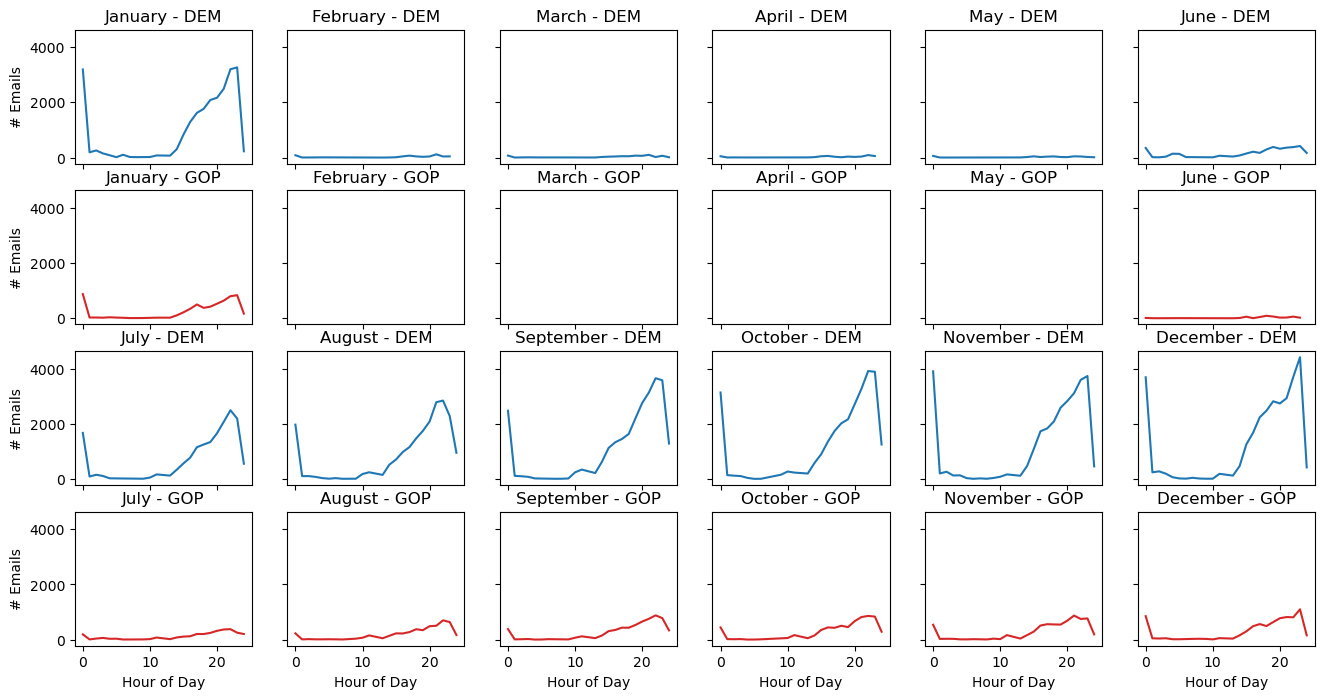

In [65]:
fig, axs = plt.subplots(4, 6,sharex=True, sharey=True, figsize=(16,8))

axs[0, 0].plot(m1d['Hour_Mil'], m1d['Count'], 'tab:blue')
axs[0, 0].set_title('January - DEM')

axs[0, 1].plot(m2d['Hour_Mil'], m2d['Count'], 'tab:blue')
axs[0, 1].set_title('February - DEM')

axs[0, 2].plot(m3d['Hour_Mil'], m3d['Count'], 'tab:blue')
axs[0, 2].set_title('March - DEM')

axs[0, 3].plot(m4d['Hour_Mil'], m4d['Count'], 'tab:blue')
axs[0, 3].set_title('April - DEM')

axs[0, 4].plot(m5d['Hour_Mil'], m5d['Count'], 'tab:blue')
axs[0, 4].set_title('May - DEM')

axs[0, 5].plot(m6d['Hour_Mil'], m6d['Count'], 'tab:blue')
axs[0, 5].set_title('June - DEM')


axs[1, 0].plot(m1g['Hour_Mil'], m1g['Count'], 'tab:red')
axs[1, 0].set_title('January - GOP')

axs[1, 1].plot(m2g['Hour_Mil'], m2g['Count'], 'tab:red')
axs[1, 1].set_title('February - GOP')

axs[1, 2].plot(m3g['Hour_Mil'], m3g['Count'], 'tab:red')
axs[1, 2].set_title('March - GOP')

axs[1, 3].plot(m4g['Hour_Mil'], m4g['Count'], 'tab:red')
axs[1, 3].set_title('April - GOP')

axs[1, 4].plot(m5g['Hour_Mil'], m5g['Count'], 'tab:red')
axs[1, 4].set_title('May - GOP')

axs[1, 5].plot(m6g['Hour_Mil'], m6g['Count'], 'tab:red')
axs[1, 5].set_title('June - GOP')


axs[2, 0].plot(m7d['Hour_Mil'], m7d['Count'], 'tab:blue')
axs[2, 0].set_title('July - DEM')

axs[2, 1].plot(m8d['Hour_Mil'], m8d['Count'], 'tab:blue')
axs[2, 1].set_title('August - DEM')

axs[2, 2].plot(m9d['Hour_Mil'], m9d['Count'], 'tab:blue')
axs[2, 2].set_title('September - DEM')

axs[2, 3].plot(m10d['Hour_Mil'], m10d['Count'], 'tab:blue')
axs[2, 3].set_title('October - DEM')

axs[2, 4].plot(m11d['Hour_Mil'], m11d['Count'], 'tab:blue')
axs[2, 4].set_title('November - DEM')

axs[2, 5].plot(m12d['Hour_Mil'], m12d['Count'], 'tab:blue')
axs[2, 5].set_title('December - DEM')


axs[3, 0].plot(m7g['Hour_Mil'], m7g['Count'], 'tab:red')
axs[3, 0].set_title('July - GOP')

axs[3, 1].plot(m8g['Hour_Mil'], m8g['Count'], 'tab:red')
axs[3, 1].set_title('August - GOP')

axs[3, 2].plot(m9g['Hour_Mil'], m9g['Count'], 'tab:red')
axs[3, 2].set_title('September - GOP')

axs[3, 3].plot(m10g['Hour_Mil'], m10g['Count'], 'tab:red')
axs[3, 3].set_title('October - GOP')

axs[3, 4].plot(m11g['Hour_Mil'], m11g['Count'], 'tab:red')
axs[3, 4].set_title('November - GOP')

axs[3, 5].plot(m12g['Hour_Mil'], m12g['Count'], 'tab:red')
axs[3, 5].set_title('December - GOP')

for ax in axs.flat:
    ax.set(xlabel='Hour of Day', ylabel='# Emails')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()



#### Emails sent by Country

In [66]:
df['country'].value_counts()

United States     74148
n/a                4440
United Kingdom     3011
Canada             1071
New Zealand         171
France              130
Australia            93
Ireland              78
Germany              43
Italy                41
Netherlands          30
Sweden               30
Switzerland          28
Brazil                1
Name: country, dtype: Int64

In [67]:
UK = df[df['country']=="United Kingdom"]
CAN = df[df['country']=="Canada"]
NZ = df[df['country']=="New Zealand"]
FRA = df[df['country']=="France"]

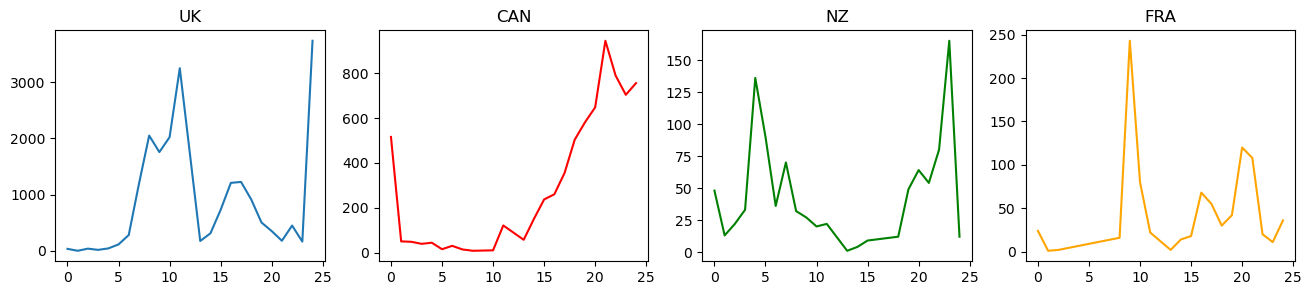

In [68]:
#When are emails sent?
new_df1 = UK.groupby(['Hour_Mil']).sum().reset_index()
new_df1.rename(columns={new_df1.columns[1]: "Count" }, inplace = True)

new_df2 = CAN.groupby(['Hour_Mil']).sum().reset_index()
new_df2.rename(columns={new_df2.columns[1]: "Count" }, inplace = True)


new_df3 = NZ.groupby(['Hour_Mil']).sum().reset_index()
new_df3.rename(columns={new_df3.columns[1]: "Count" }, inplace = True)


new_df4 = FRA.groupby(['Hour_Mil']).sum().reset_index()
new_df4.rename(columns={new_df4.columns[1]: "Count" }, inplace = True)


f = plt.figure()
f.set_figwidth(16)
f.set_figheight(3)


#plot 1:
plt.subplot(1, 4, 1)
plt.plot(new_df1['Hour_Mil'],new_df1['Count'])
plt.title("UK")

#plot 2:

plt.subplot(1, 4, 2)
plt.plot(new_df2['Hour_Mil'],new_df2['Count'],color='red')
plt.title("CAN")

#plot 3:
plt.subplot(1, 4, 3)
plt.plot(new_df3['Hour_Mil'],new_df3['Count'],color='green')
plt.title("NZ")

#plot 4:

plt.subplot(1, 4, 4)
plt.plot(new_df4['Hour_Mil'],new_df4['Count'],color='orange')
plt.title("FRA")

#plt.suptitle("# Emails by Hour for 4 countries")
plt.show()

In [69]:
df_dom['State_Ind'] = np.where(df_dom['locality'].isin([
    'Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 
    'Colorado', 'Connecticut', 'Delaware', 'District of Columbia', 
    'Florida', 'Georgia', 'Hawaii', 'Idaho', 'Illinois', 
    'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 
    'Maine', 'Maryland', 'Massachusetts', 'MIchigan', 'Minnesota',
    'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada', 
    'New Hampshire', 'New Jersey', 'New Mexico', 'New York', 'North Carolina', 
    'North Dakota', 'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania',
    'Rhode Island', 'South Carolina', 'South Dakota', 'Tennessee', 
    'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington', 'West Virginia', 
    'Wisconsin', 'Wyoming'
]),1,0)
df_dom['State_Ind'].value_counts()

0    45737
1    28411
Name: State_Ind, dtype: int64

In [70]:
#Fix Michigan
df_dom['locality'] = np.where(df_dom['locality']=="MIchigan","Michigan",df_dom['locality'])

test = df_dom[df_dom['State_Ind']==1]
test['locality'].value_counts()[0:10]

California        3098
Texas             2371
Massachusetts     1394
Minnesota         1252
New York          1107
New Jersey        1064
North Carolina    1043
Arizona           1037
Virginia           910
Florida            872
Name: locality, dtype: int64

In [71]:
#Get the State Abbreviation in the larger dataset so we can make some choropleth maps

test = df_dom[df_dom['State_Ind']==1]
test = test[['locality']]

# Get State Crosswalk From Generic Website
crosswalk = 'http://app02.clerk.org/menu/ccis/Help/CCIS%20Codes/state_codes.html'
states = pd.read_html(crosswalk)[0]

# Demo Crosswalking State Name to State Abbreviation
test['ST'] = test['locality'].map(dict(zip(states['Description'], 
                                         states['Code'])))

test = test.drop_duplicates(subset=['locality'])

print(test.shape)
test.head()

(50, 2)


,locality,ST
3,Ohio,OH
4,Texas,TX
5,Kentucky,KY
8,Washington,WA
9,California,CA


In [72]:
#Join ST on larger dataset
df_dom_states = df_dom[df_dom['State_Ind']==1]
map_df = pd.merge(df_dom_states, test, on="locality")

print('Left Dimensions: ',df_dom_states.shape)
print('Right Dimensions: ',test.shape)
print('New Dimensions: ',map_df.shape)

Left Dimensions:  (28411, 17)
Right Dimensions:  (50, 2)
New Dimensions:  (28411, 18)


In [73]:
pop = pd.read_csv("https://raw.githubusercontent.com/statzenthusiast921/FirearmsAnalysis/main/main/data/states_and_pops.csv")
pop = pop[pop['Year']==2018]
pop = pop[['State','Pop']]

map_adj_df = pd.merge(map_df, pop, left_on="locality", right_on='State')

print('Left Dimensions: ',map_df.shape)
print('Right Dimensions: ',pop.shape)
print('New Dimensions: ',map_adj_df.shape)

Left Dimensions:  (28411, 18)
Right Dimensions:  (51, 2)
New Dimensions:  (28411, 20)


In [114]:
# #Emails sent by State
# #!pip install folium
# import folium

# def make_folium_map(input_data,adj_ind):
#     #Initialize the map and store it in a m object
#     m = folium.Map(location=[40, -95], zoom_start=4)
#     url = ("https://raw.githubusercontent.com/python-visualization/folium/master/examples/data")
#     state_geo = f"{url}/us-states.json"

#     #Set up data for choropleth
#     state_data = pd.DataFrame(input_data['ST'].value_counts()).reset_index()
#     state_data.rename(columns={
#             state_data.columns[0]: "ST" ,
#             state_data.columns[1]: "Count" 

#     }, inplace = True)
    
#     #Adjust for population or no?
#     adj_df = map_adj_df[['ST','Pop']]
#     state_data = pd.merge(state_data, adj_df, on='ST')
#     state_data['Adj. Count'] = (state_data['Count'] / state_data['Pop'])*100000
    

    
#     #Print out the choropleth map
#     folium.Choropleth(
#         geo_data=state_geo,
#         name="choropleth",
#         data=state_data,
#         columns=["ST", adj_ind],
#         key_on="feature.id",
#         fill_color="YlGn",
#         fill_opacity=0.7,
#         line_opacity=.1,
#         legend_name="# Emails",
#     ).add_to(m)

#     folium.LayerControl().add_to(m)

#     return m

# make_folium_map(map_df,"Count")

In [115]:
# #Democratic Choropleth Map
# party_df1 = map_adj_df[map_adj_df['party']=="Democratic"]
# make_folium_map(party_df1,"Count")

In [116]:
# #Republican Choropleth Map
# party_df2 = map_adj_df[map_adj_df['party']=="Republican"]
# make_folium_map(party_df2,"Count")

In [117]:
# #Adjusted for Population - All Emails
# make_folium_map(map_adj_df,"Adj. Count")

In [118]:
# #Adjusted for Population - Democratic Emails
# make_folium_map(party_df1,"Adj. Count")

In [119]:
# #Adjusted for Population - Republican Emails
# make_folium_map(party_df2,"Adj. Count")

### Prepare data for sentiment classification

In [85]:
from nltk.tokenize import RegexpTokenizer
#!pip install contractions
import contractions

def punct(text):
    token=RegexpTokenizer(r'\w+')#regex
    text = token.tokenize(text)
    text= " ".join(text)
    return text 

def remove_special_characters(text):
    # define the pattern to keep
    pat = r'[^a-zA-z0-9.,!?/:;\"\'\s]' 
    return re.sub(pat, '', text)

def remove_digits(text):
    pattern = r'[^a-zA-z.,!?/:;\"\'\s]' 
    return re.sub(pattern, '', text)

def lemmatize(text):
    lemmed = contractions.fix(str(text))
    return lemmed



def remove_weird_words_that_showed_up_in_analysis_(str):
    #select english stopwords
    cachedStopWords = set(stopwords.words("english"))
    #add custom words
    cachedStopWords.update(('height','width','style','saved','payment','information','https',
                            'fmailchi','mp','chip','tr','td','style','font','size','px','view'
                            'email','browser','zwnj','metered','paywall','articles','vertical',
                            'align','top','item','img','src','rss','mc','actblue','com','donate',
                            'donation', 'padding','bottom', 'members','pre'
                           ))
    #remove stop words
    new_str = ' '.join([word for word in str.split() if word not in cachedStopWords]) 
    return new_str



In [86]:
#Apply standardizing functions to body of email column
from nltk.corpus import stopwords
stop = stopwords.words('english')

#0.) Convert everything to string
df['cleaned_body'] = df['body'].astype(str)
#1.) Lowercase
df.loc[:,'cleaned_body'] = df['cleaned_body'].str.lower()
#2.) Remove punctuation
df.loc[:,'cleaned_body'] = df['cleaned_body'].apply(func = punct)
#3.) Remove non alpha-numeric characters
df.loc[:,'cleaned_body'] = df['cleaned_body'].apply(func = remove_special_characters)
#4.) Remove digits
df.loc[:,'cleaned_body'] = df['cleaned_body'].apply(func = remove_digits)
#5.) Lemmatize words
df.loc[:,'cleaned_body'] = df['cleaned_body'].apply(func = lemmatize)
#6. Remove stop words
df.loc[:,'cleaned_body'] = df['cleaned_body'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
#7. Remove weird words that showed up in the analysis
df.loc[:,'cleaned_body'] = df['cleaned_body'].apply(func = remove_weird_words_that_showed_up_in_analysis_)

#Present results
df['cleaned_body'].head(5)

1    justice democrats john last month needed ask h...
2    dear friend seen images read stories migrants ...
3    team access education fundamental child succes...
4    beto america john trump administration created...
5    john tomorrow fourth july day us come together...
Name: cleaned_body, dtype: object

In [87]:
#Set up VADER score to get labels for doing classification later
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()
df['sentiment'] = df['cleaned_body'].map(lambda x: sia.polarity_scores(x))
df['sentiment'].head(4)

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/jonzimmerman/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


1    {'neg': 0.047, 'neu': 0.482, 'pos': 0.471, 'co...
2    {'neg': 0.207, 'neu': 0.674, 'pos': 0.12, 'com...
3    {'neg': 0.143, 'neu': 0.658, 'pos': 0.199, 'co...
4    {'neg': 0.069, 'neu': 0.684, 'pos': 0.247, 'co...
Name: sentiment, dtype: object

In [88]:
df['compound']  = df['sentiment'].apply(lambda score_dict: score_dict['compound'])
df['comp_score'] = df['compound'].apply(lambda x: 1 if x >=0 else 0)
df.head(2)

,sender,subject,date,body,party,country,locality,office,time,AM_PM,Hour,Hour_Mil,month,day,year,month_num,cleaned_body,sentiment,compound,comp_score
1,JusticeDemocrats.com,Critical preparations,"July 3, 2019","Justice Democrats John Last month, we neede...",Democratic,United States,n/a,n/a,11:28 PM,PM,11,23,July,3,2019,7,justice democrats john last month needed ask h...,"{'neg': 0.047, 'neu': 0.482, 'pos': 0.471, 'co...",0.9912,1
2,Ana Maria Archila,TAKE ACTION for Freedom: #CloseTheCamps,"July 3, 2019","Dear friend, We have all seen the images and r...",n/a,United States,n/a,n/a,11:31 PM,PM,11,23,July,3,2019,7,dear friend seen images read stories migrants ...,"{'neg': 0.207, 'neu': 0.674, 'pos': 0.12, 'com...",-0.9807,0


In [89]:
# df.to_csv('/Users/jonzimmerman/Desktop/Data Projects/Political Emails/main/data/emails_df_full.csv', index=False, header=True)


In [90]:
df.shape

(83315, 20)

In [91]:
df.columns

Index(['sender', 'subject', 'date', 'body', 'party', 'country', 'locality',
       'office', 'time', 'AM_PM', 'Hour', 'Hour_Mil', 'month', 'day', 'year',
       'month_num', 'cleaned_body', 'sentiment', 'compound', 'comp_score'],
      dtype='object')

### N-Grams

In [94]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
#!pip install wordcloud
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator


# Define function to visualise n-grams
def get_top_ngram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(n, n)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) 
                  for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:10]


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/jonzimmerman/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


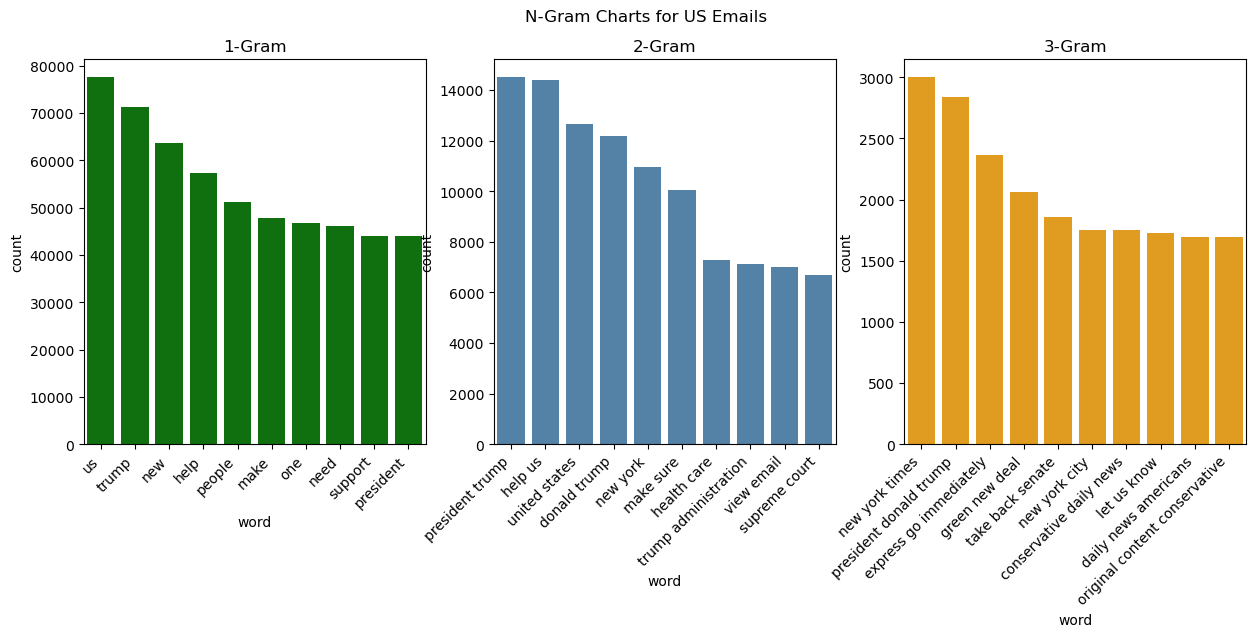

In [95]:
#N-grams for just the United States
import seaborn as sns
df_dom = df[df['country']=="United States"]

top_bigrams1 = pd.DataFrame(get_top_ngram(df_dom['cleaned_body'],1)[:10],columns=['word','count'])
top_bigrams2 = pd.DataFrame(get_top_ngram(df_dom['cleaned_body'],2)[:10],columns=['word','count'])
top_bigrams3 = pd.DataFrame(get_top_ngram(df_dom['cleaned_body'],3)[:10],columns=['word','count'])

fig, axes = plt.subplots(1, 3, figsize=(15, 5))
fig.suptitle('N-Gram Charts for US Emails')


#----------1-Gram----------#
sns.barplot(ax=axes[0], x=top_bigrams1['word'], y=top_bigrams1['count'],color = 'green')
axes[0].set_title('1-Gram')
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=45, horizontalalignment='right')

#----------2-Gram----------#
sns.barplot(ax=axes[1], x=top_bigrams2['word'], y=top_bigrams2['count'],color='steelblue')
axes[1].set_title('2-Gram')
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=45, horizontalalignment='right')

#----------3-Gram----------#
sns.barplot(ax=axes[2], x=top_bigrams3['word'], y=top_bigrams3['count'], color='orange')
axes[2].set_title('3-Gram')
axes[2].set_xticklabels(axes[2].get_xticklabels(), rotation=45, horizontalalignment='right');

In [96]:
df_dom['party'].value_counts()

n/a                                        39111
Democratic                                 27790
Republican                                  6561
Democratic Socialists of America (DSA)       362
Communist Party USA                          133
Green Party of the United States              76
Progressive Party (US)                        73
Minnesota Democratic-Farmer-Labor Party       27
Constitution Party                             9
Libertarian Party (US)                         4
Democratic-Farmer-Labor                        2
Name: party, dtype: Int64

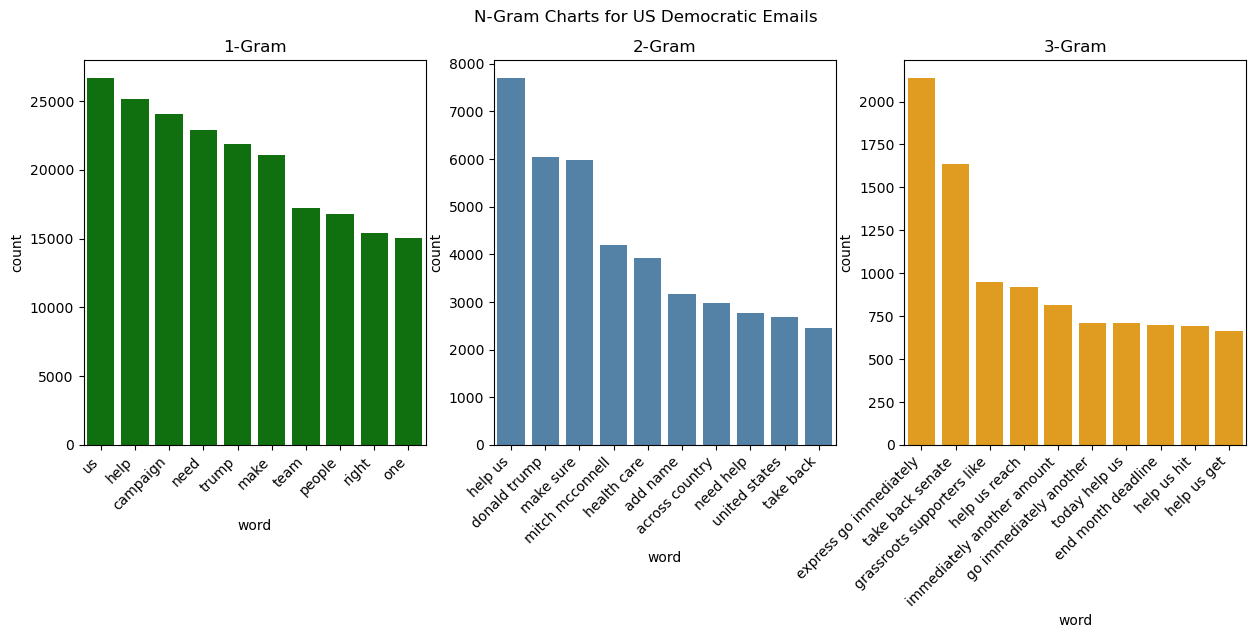

In [97]:
df_dom_dem = df_dom[df_dom['party']=="Democratic"]

top_bigrams1 = pd.DataFrame(get_top_ngram(df_dom_dem['cleaned_body'],1)[:10],columns=['word','count'])
top_bigrams2 = pd.DataFrame(get_top_ngram(df_dom_dem['cleaned_body'],2)[:10],columns=['word','count'])
top_bigrams3 = pd.DataFrame(get_top_ngram(df_dom_dem['cleaned_body'],3)[:10],columns=['word','count'])

fig, axes = plt.subplots(1, 3, figsize=(15, 5))
fig.suptitle('N-Gram Charts for US Democratic Emails')


#----------1-Gram----------#
sns.barplot(ax=axes[0], x=top_bigrams1['word'], y=top_bigrams1['count'],color = 'green')
axes[0].set_title('1-Gram')
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=45, horizontalalignment='right')

#----------2-Gram----------#
sns.barplot(ax=axes[1], x=top_bigrams2['word'], y=top_bigrams2['count'],color='steelblue')
axes[1].set_title('2-Gram')
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=45, horizontalalignment='right')

#----------3-Gram----------#
sns.barplot(ax=axes[2], x=top_bigrams3['word'], y=top_bigrams3['count'], color='orange')
axes[2].set_title('3-Gram')
axes[2].set_xticklabels(axes[2].get_xticklabels(), rotation=45, horizontalalignment='right');

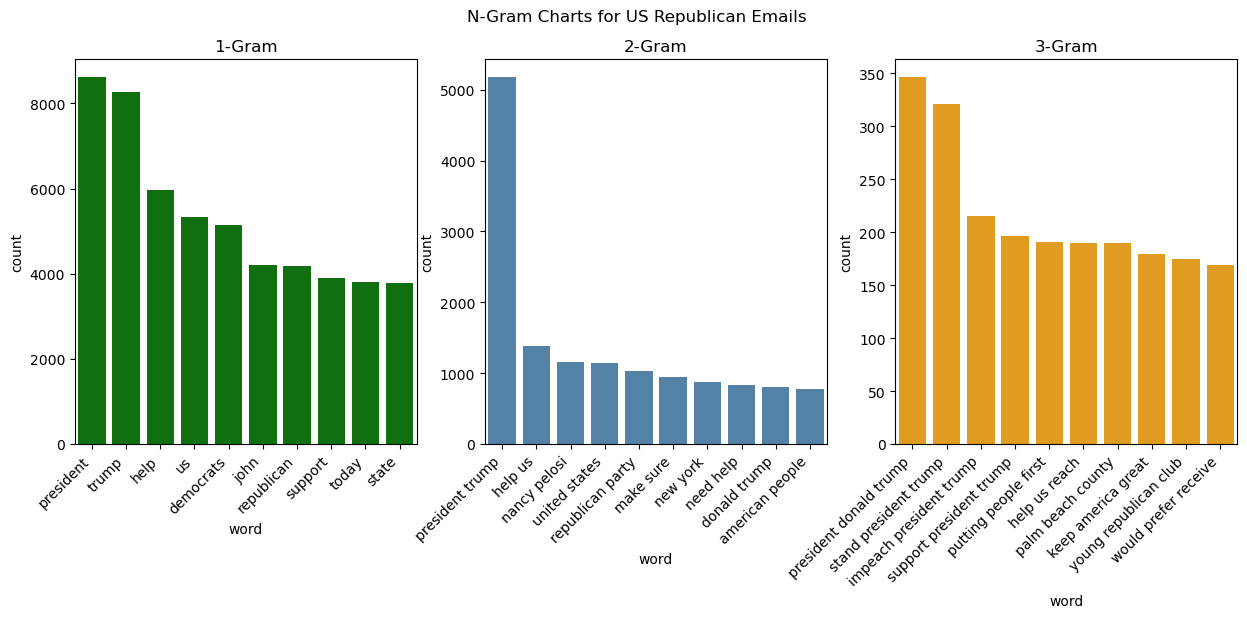

In [98]:
df_dom_gop = df_dom[df_dom['party']=="Republican"]

top_bigrams1 = pd.DataFrame(get_top_ngram(df_dom_gop['cleaned_body'],1)[:10],columns=['word','count'])
top_bigrams2 = pd.DataFrame(get_top_ngram(df_dom_gop['cleaned_body'],2)[:10],columns=['word','count'])
top_bigrams3 = pd.DataFrame(get_top_ngram(df_dom_gop['cleaned_body'],3)[:10],columns=['word','count'])

fig, axes = plt.subplots(1, 3, figsize=(15, 5))
fig.suptitle('N-Gram Charts for US Republican Emails')


#----------1-Gram----------#
sns.barplot(ax=axes[0], x=top_bigrams1['word'], y=top_bigrams1['count'],color = 'green')
axes[0].set_title('1-Gram')
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=45, horizontalalignment='right')

#----------2-Gram----------#
sns.barplot(ax=axes[1], x=top_bigrams2['word'], y=top_bigrams2['count'],color='steelblue')
axes[1].set_title('2-Gram')
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=45, horizontalalignment='right')

#----------3-Gram----------#
sns.barplot(ax=axes[2], x=top_bigrams3['word'], y=top_bigrams3['count'], color='orange')
axes[2].set_title('3-Gram')
axes[2].set_xticklabels(axes[2].get_xticklabels(), rotation=45, horizontalalignment='right');

### Topic Modeling

In [107]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import plotly.express as px
from sklearn.decomposition import NMF

#Define function to create a word cloud visualization of topic modelling results
def topic_model_pipeline(data,filter_num,topic_num,title):
    subset = data[data['comp_score']==filter_num]

    #Identify topics with Non-Negative Matrix Factorization method
    vectorizer = TfidfVectorizer(max_df=0.95,min_df=2,stop_words='english')
    dtm = vectorizer.fit_transform(subset['cleaned_body'].values.astype('U'))

    nmf_mod = NMF(n_components=5,random_state=42)
    nmf_mod.fit(dtm)

    df_topics = nmf_mod.transform(dtm)
    df_topic_label = {
            0:"Topic 1",
            1:"Topic 2",       
            2:"Topic 3",
            3:"Topic 4",
            4:"Topic 5"
        }

    #Label text in dataframe as belonging to one of the topics
    subset['topic_num'] = df_topics.argmax(axis=1)
    subset['topic_label'] = subset['topic_num'].map(df_topic_label)

    topic_count = subset.groupby(['topic_label']).size().reset_index(name='counts')
    topic_count = topic_count.sort_values(by='counts',ascending=False).reset_index()
    top_topic = topic_count['topic_label'][topic_num]

    wc_df = subset[subset['topic_label']==top_topic]

    #Let's look at top topic represented in the word cloud
    wc_df_topic = wc_df['cleaned_body']

    text = ' '.join(wc_df_topic)

    # Create and generate a word cloud image:
    wordcloud = WordCloud().generate(text)

    # Display the generated image:
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'{title}')
    plt.axis("off")
    plt.show()

## Any latent topics in the emails by classification?

#### Arg1 = dataset
#### Arg2 = 0 or 1 (neg vs. pos sentiment)
#### Arg3 = 0 - 4 (Topics 1-5)

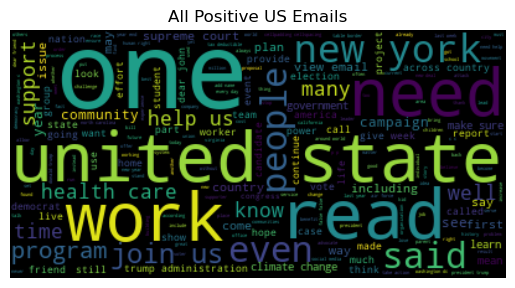

In [108]:
#Positive Sentiment - all of US
topic_model_pipeline(df_dom,1,0,'All Positive US Emails')

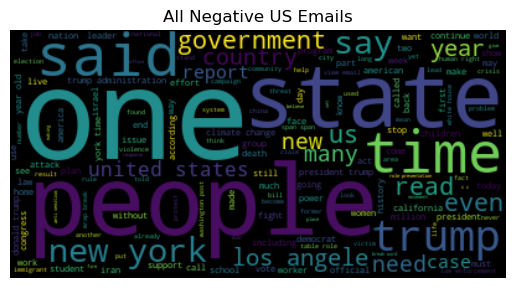

In [109]:
#Negative Sentiment - all of US
topic_model_pipeline(df_dom,0,0,'All Negative US Emails')

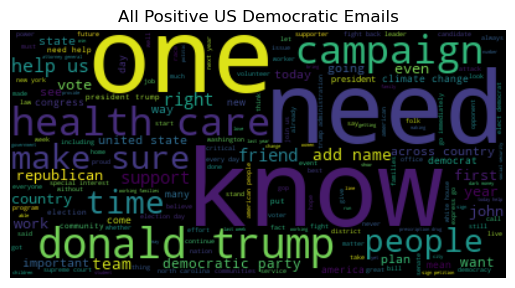

In [110]:
#Positive Sentiment - US - DEM
topic_model_pipeline(df_dom_dem,1,0,'All Positive US Democratic Emails')

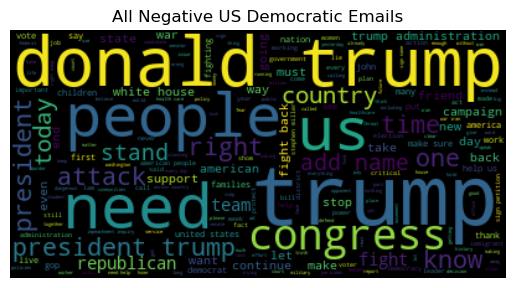

In [111]:
#Negative Sentiment - US -DEM
topic_model_pipeline(df_dom_dem,0,0,'All Negative US Democratic Emails')

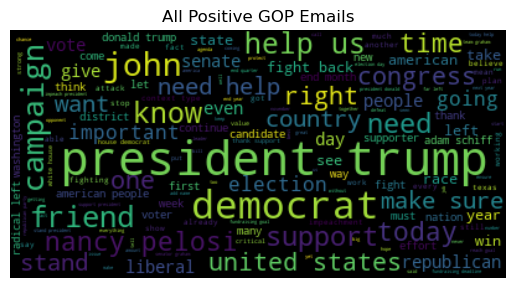

In [112]:
#Positive Sentiment - US - GOP
topic_model_pipeline(df_dom_gop,1,0,'All Positive GOP Emails')

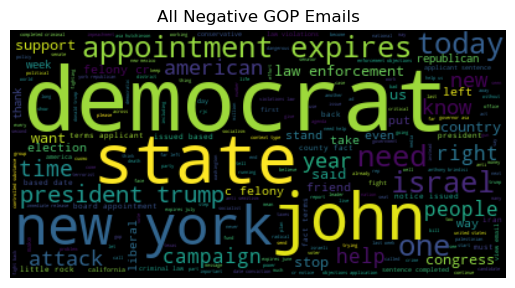

In [113]:
#Negative Sentiment - US - GOP
topic_model_pipeline(df_dom_gop,0,0,'All Negative GOP Emails')

### Can we associate words used to either of the two major political parties?

## Let's do some sentiment classification prediction

#### Model #1: Logistic Regression

In [36]:
df['comp_score'].value_counts()

1    68723
0    14592
Name: comp_score, dtype: int64

In [37]:
model_df = df[df['country']=='United States']
model_df.shape

(74148, 20)

In [38]:
model_df.head(1)

,sender,subject,date,body,party,country,locality,office,time,AM_PM,Hour,Hour_Mil,month,day,year,month_num,cleaned_body,sentiment,compound,comp_score
1,JusticeDemocrats.com,Critical preparations,"July 3, 2019","Justice Democrats John Last month, we neede...",Democratic,United States,n/a,n/a,11:28 PM,PM,11,23,July,3,2019,7,justice democrats john last month needed ask h...,"{'neg': 0.047, 'neu': 0.482, 'pos': 0.471, 'co...",0.9912,1


In [39]:
from sklearn.model_selection import train_test_split

y = model_df['comp_score']
X = model_df['cleaned_body']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(51903,)
(51903,)
(22245,)
(22245,)


In [40]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()
vectorizer.fit(X)

X_train = vectorizer.transform(X_train)
X_test = vectorizer.transform(X_test)

print('Train Data:',X_train.shape)
print('Test Data:',X_test.shape)

Train Data: (51903, 302765)
Test Data: (22245, 302765)


In [41]:
#training the model
from sklearn.linear_model import LogisticRegression

weights = {0:5.0, 1:1.0}

lr=LogisticRegression(
#     penalty='l2',
#     max_iter=500,
#     C=1,
    random_state=42,
    class_weight='balanced'
)

#Fitting the model
lr_model=lr.fit(X_train,y_train)
print(lr_model)

LogisticRegression(class_weight='balanced', random_state=42)


In [42]:
#Make predictions
lr_predict=lr.predict(X_test)

print('Negative Predictions: ', lr_predict.tolist().count(0))
print('Positive Predictions: ', lr_predict.tolist().count(1))

Negative Predictions:  4007
Positive Predictions:  18238


In [43]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score, f1_score

#Accuracy score and F1 score
lr_model_score=accuracy_score(y_test,lr_predict)
f1_score_imb = f1_score(y_test, lr_predict)

print("Accuracy:",lr_model_score)
print("F1 Score:",f1_score_imb)

Accuracy: 0.9471341874578557
F1 Score: 0.9678723636761011


In [44]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from numpy import mean

#Define evaluation procedure
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluate model
scores = cross_val_score(lr, X_train, y_train, scoring='roc_auc', cv=cv, n_jobs=-1)
# summarize performance
print('Mean ROC AUC: %.3f' % mean(scores))

Mean ROC AUC: 0.970


In [45]:
#Classification report for Logistic Regression
lr_report=classification_report(y_test,lr_predict,target_names=['Negative','Positive'])
print(lr_report)

              precision    recall  f1-score   support

    Negative       0.84      0.86      0.85      3879
    Positive       0.97      0.96      0.97     18366

    accuracy                           0.95     22245
   macro avg       0.90      0.91      0.91     22245
weighted avg       0.95      0.95      0.95     22245



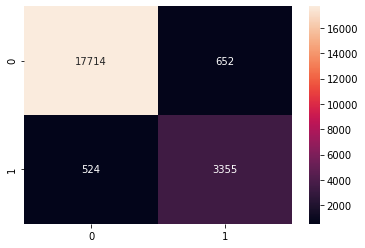

In [69]:
#Confusion matrix for Logistic Regression
conf_mat=confusion_matrix(y_test,lr_predict,labels=[1,0])
sns.heatmap(conf_mat, annot=True, fmt='.0f'); #annot=True to annotate cells

#### Model #2: Random Forest Classification

In [47]:
from sklearn.ensemble import RandomForestClassifier
# creating a RF classifier
rfc = RandomForestClassifier(
    n_estimators = 10,
    class_weight='balanced',
    verbose=2
) 

# Training the model on the training dataset
rfc_fit = rfc.fit(X_train,y_train)
print(rfc_fit)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


building tree 1 of 10


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.0s remaining:    0.0s


building tree 2 of 10
building tree 3 of 10
building tree 4 of 10
building tree 5 of 10
building tree 6 of 10
building tree 7 of 10
building tree 8 of 10
building tree 9 of 10
building tree 10 of 10
RandomForestClassifier(class_weight='balanced', n_estimators=10, verbose=2)


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:   36.3s finished


In [48]:
#Make predictions
rfc_predict=rfc.predict(X_test)

print('Negative Predictions: ', rfc_predict.tolist().count(0))
print('Positive Predictions: ', rfc_predict.tolist().count(1))

Negative Predictions:  2255
Positive Predictions:  19990


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.1s finished


In [49]:
#Accuracy score and F1 score
rfc_score=accuracy_score(y_test,rfc_predict)
lr_f1_score_imb = f1_score(y_test, rfc_predict)

print("Accuracy :",rfc_score)
print("F1 Score :",lr_f1_score_imb)

Accuracy : 0.8786244099797708
F1 Score : 0.9296068411721764


In [50]:
# #Define evaluation procedure
rfc_cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluate model
scores = cross_val_score(rfc, X_train, y_train, scoring='roc_auc', cv=rfc_cv, n_jobs=-1)
# summarize performance
print('Mean ROC AUC: %.3f' % mean(scores))

Mean ROC AUC: 0.871


In [51]:
#Classification report for Random Forest Model
rfc_report=classification_report(y_test,rfc_predict,target_names=['Negative','Positive'])
print(rfc_report)

              precision    recall  f1-score   support

    Negative       0.76      0.44      0.56      3879
    Positive       0.89      0.97      0.93     18366

    accuracy                           0.88     22245
   macro avg       0.83      0.71      0.74     22245
weighted avg       0.87      0.88      0.87     22245



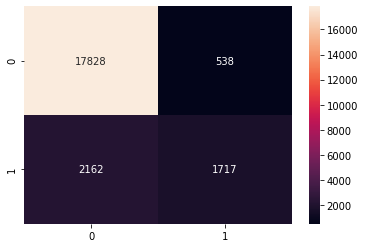

In [68]:
#confusion matrix for Random Forest Model
cm_rfc=confusion_matrix(y_test,rfc_predict,labels=[1,0])
sns.heatmap(cm_rfc, annot=True, fmt='.0f'); #annot=True to annotate cells

#### Model #3: NN Classification

In [61]:
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Dense

# from sklearn.preprocessing import LabelEncoder
# le = LabelEncoder()
# le.fit(y)
# y_train = le.transform(y_train)
# y_test = le.transform(y_test)

# #Set up the NN
# model = Sequential()
# #Add layers
# model.add(Dense(units=100, activation='relu', input_dim=len(vectorizer.get_feature_names())))
# model.add(Dense(units=3, activation='sigmoid'))
# model.compile(
#     loss='sparse_categorical_crossentropy', 
#     optimizer='adam', 
#     metrics=['accuracy']
# )

# history = model.fit(X_train, y_train, epochs=2, verbose=1)
# scores = model.evaluate(X_test, y_test, verbose=1)
# print("Accuracy:", scores[1])

#### Model #4: XGBoost Classification

In [53]:
import xgboost as xgb

#Set up XGBoost classification model
xgb_cl = xgb.XGBClassifier(scale_pos_weight=5)

# Fit the model to training data
xgb_fit = xgb_cl.fit(X_train, y_train)
print(xgb_fit)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)


In [54]:
#Get the predictions
xgb_preds = xgb_cl.predict(X_test)

print('Negative Predictions: ', xgb_preds.tolist().count(0))
print('Positive Predictions: ', xgb_preds.tolist().count(1))

Negative Predictions:  1783
Positive Predictions:  20462


In [55]:
#Accuracy score and F1 score
xbg_score=accuracy_score(y_test,xgb_preds)
xgb_f1_score_imb = f1_score(y_test, xgb_preds)

print("Accuracy :",xbg_score)
print("F1 Score :",xgb_f1_score_imb)

Accuracy : 0.89291975724882
F1 Score : 0.9386525188008652


In [56]:
# #Define evaluation procedure
xgb_cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

#Evaluate model
scores = cross_val_score(xgb_cl, X_train, y_train, scoring='roc_auc', cv=xgb_cv, n_jobs=-1)

#Summarize performance
print('Mean ROC AUC: %.3f' % mean(scores))

Mean ROC AUC: 0.946


In [57]:
#Classification report for XGBoost Classification Model
xgb_report=classification_report(y_test,xgb_preds,target_names=['Negative','Positive'])
print(xgb_report)

              precision    recall  f1-score   support

    Negative       0.92      0.42      0.58      3879
    Positive       0.89      0.99      0.94     18366

    accuracy                           0.89     22245
   macro avg       0.91      0.71      0.76     22245
weighted avg       0.90      0.89      0.88     22245



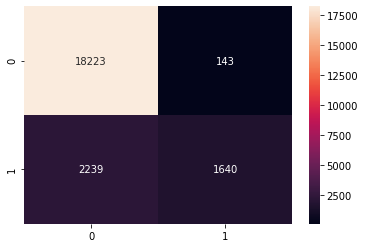

In [67]:
#Confusion matrix for XGBoost Classification Model
cm_xgb=confusion_matrix(y_test,xgb_preds,labels=[1,0])
sns.heatmap(cm_xgb, annot=True, fmt='.0f'); #annot=True to annotate cells

### Generate new emails